<a href="https://colab.research.google.com/github/Rohan1-tech/Identifying-Market-Crashes-Case-Study/blob/main/Identifying_Market_Crashes_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Important Libaries**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier




**Load Datasets**

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/cleaned_sensex.csv')


**DataSets First Look**

In [4]:
df.head(5)

,Date,Close,High,Low,Open,Volume
0,1997-07-01,4300.859863,4301.770020,4247.660156,4263.109863,0
1,1997-07-02,4333.899902,4395.310059,4295.399902,4302.959961,0
2,1997-07-03,4323.459961,4393.290039,4299.970215,4335.790039,0
3,1997-07-04,4323.819824,4347.589844,4300.580078,4332.700195,0
4,1997-07-07,4291.450195,4391.009766,4289.490234,4326.810059,0


In [ ]:
df.tail(5)

,Date,Close,High,Low,Open,Volume
6830,2025-03-24,77984.382812,78107.226562,77179.351562,77456.273438,10100
6831,2025-03-25,78017.187500,78741.687500,77745.632812,78296.281250,12700
6832,2025-03-26,77288.500000,78167.867188,77194.218750,78021.453125,10500
6833,2025-03-27,77606.429688,77747.460938,77082.507812,77087.390625,12700
6834,2025-03-28,77414.921875,77766.703125,77185.617188,77690.687500,16700


In [ ]:
# Datasets Row And Columns

In [ ]:
df.shape
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 6835
Number of Columns: 6


In [20]:
# Datasets info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6835 entries, 0 to 6834
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6835 non-null   datetime64[ns]
 1   Close         6835 non-null   float64       
 2   High          6835 non-null   float64       
 3   Low           6835 non-null   float64       
 4   Open          6835 non-null   float64       
 5   Volume        6835 non-null   int64         
 6   Daily_Return  6834 non-null   float64       
 7   SMA_20        6816 non-null   float64       
 8   SMA_50        6786 non-null   float64       
 9   STD_20        6816 non-null   float64       
 10  Upper_Band    6816 non-null   float64       
 11  Lower_Band    6816 non-null   float64       
 12  Year          6835 non-null   int32         
 13  Month         6835 non-null   int32         
 14  Day           6835 non-null   int32         
 15  Weekday       6835 non-null   int32   

In [5]:
# Convert 'Date' column to datetime

df['Date'] = pd.to_datetime(df['Date'])


In [6]:
# Duplicate Value Count

df.duplicated().sum()

np.int64(0)

In [ ]:
#  Missing values

df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


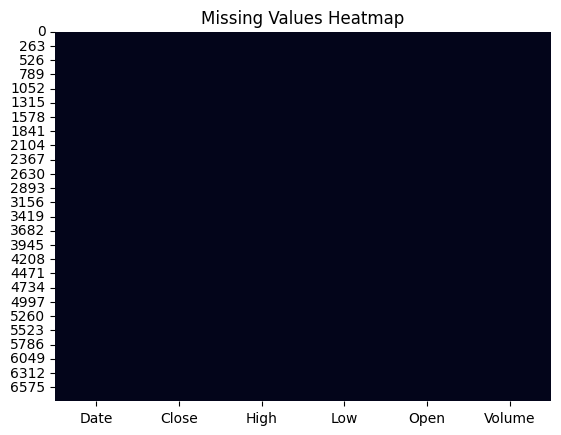

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,6835,6835.000000,6835.000000,6835.000000,6835.000000,6.835000e+03
mean,2011-05-09 03:24:59.517190912,23689.331480,23841.440412,23539.508101,23710.572978,5.953719e+04
min,1997-07-01 00:00:00,2600.120117,2682.590088,2594.870117,2621.889893,0.000000e+00
25%,2004-05-29 12:00:00,5613.715088,5685.430176,5557.225098,5633.314941,6.200000e+03
50%,2011-04-29 00:00:00,17919.300781,18040.169922,17786.130859,17920.980469,1.140000e+04
75%,2018-04-18 12:00:00,33779.134766,33953.144531,33577.779297,33779.806641,1.820000e+04
max,2025-03-28 00:00:00,85836.117188,85978.250000,85474.578125,85893.843750,3.181510e+07
std,NaN,20513.834825,20606.700419,20417.999236,20526.578017,9.059152e+05


**Dataset Overview**

The dataset used in this case study contains historical daily records of the SENSEX (Bombay Stock Exchange Sensitive Index), covering a wide time span from **July 1, 1997 to March 28, 2025**. It consists of 6,835 observations and includes six key features: Date, Open, High, Low, Close, and Volume. The Date column was converted to a proper datetime format to support time series analysis. The Open, High, Low, and Close columns represent the stock index prices for each trading day, while the Volume column indicates the number of shares traded.






Upon performing initial data quality checks, it was observed that **there are no missing values or duplicate records**, and all columns have appropriate data types. However, it's important to note that the Volume data is zero for older dates, likely due to unavailability of historical volume data, while it is populated for more recent years.







Overall, the dataset is clean, well-structured, and highly suitable for conducting time series analysis, trend exploration, and forecasting models. Its extensive time coverage of nearly** 28 years** provides a strong foundation for deep financial insights and predictive analytics.



 **Exploratory Data Analysis**

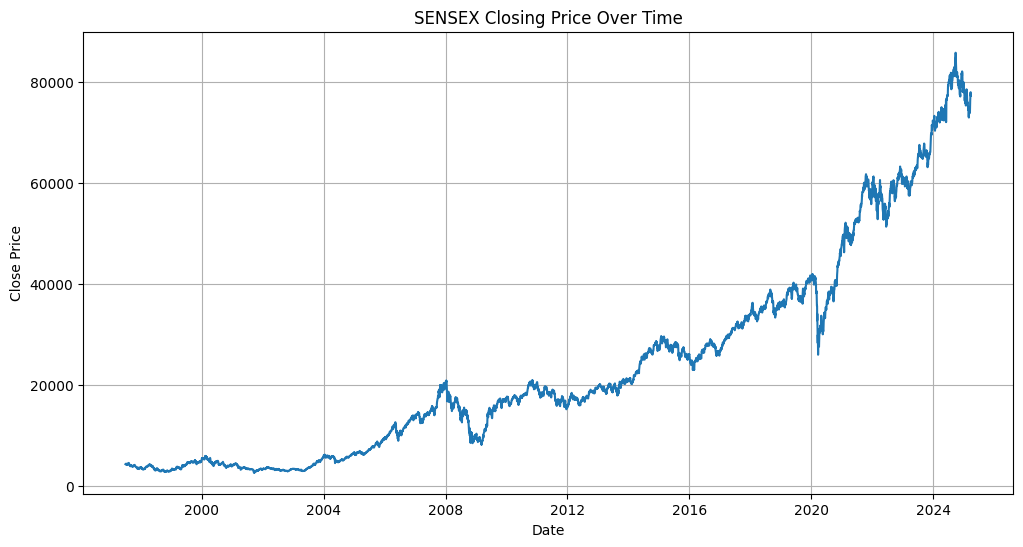

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('SENSEX Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Daily Returns'}>

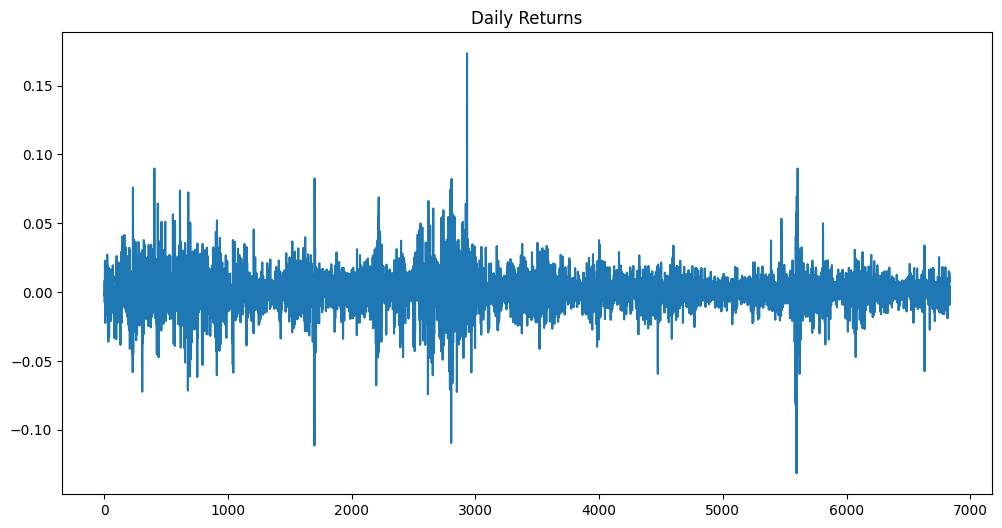

In [8]:
# Calculate and Plot Daily Returns

df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(figsize=(12,6), title='Daily Returns')


<Axes: xlabel='Daily_Return', ylabel='Count'>

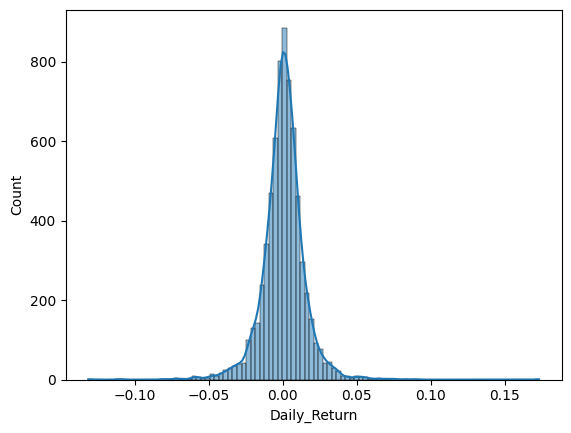

In [10]:
# Check Distribution of Daily Returns

import seaborn as sns
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True)


Text(0.5, 1.0, 'Moving Averages')

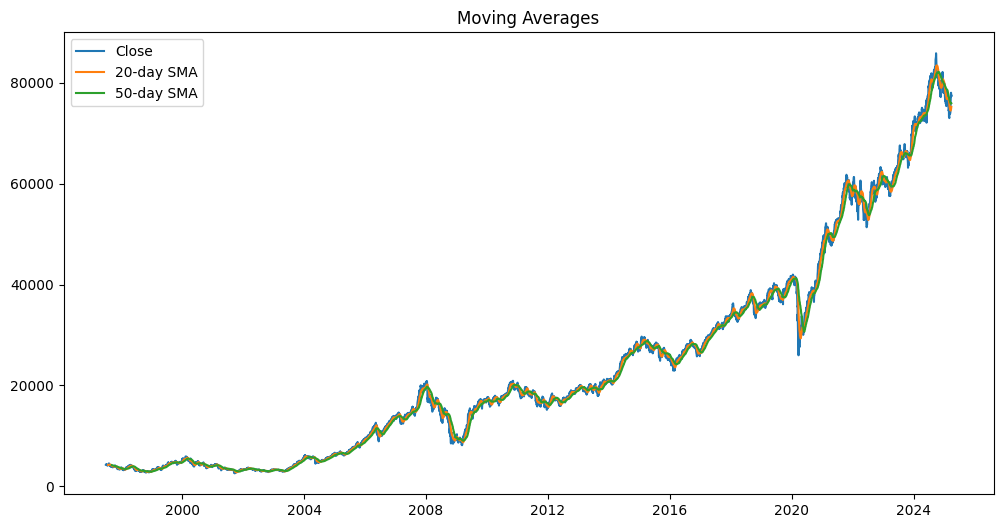

In [13]:
# Moving Averages

df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()


plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='20-day SMA')
plt.plot(df['Date'], df['SMA_50'], label='50-day SMA')
plt.legend()
plt.title('Moving Averages')



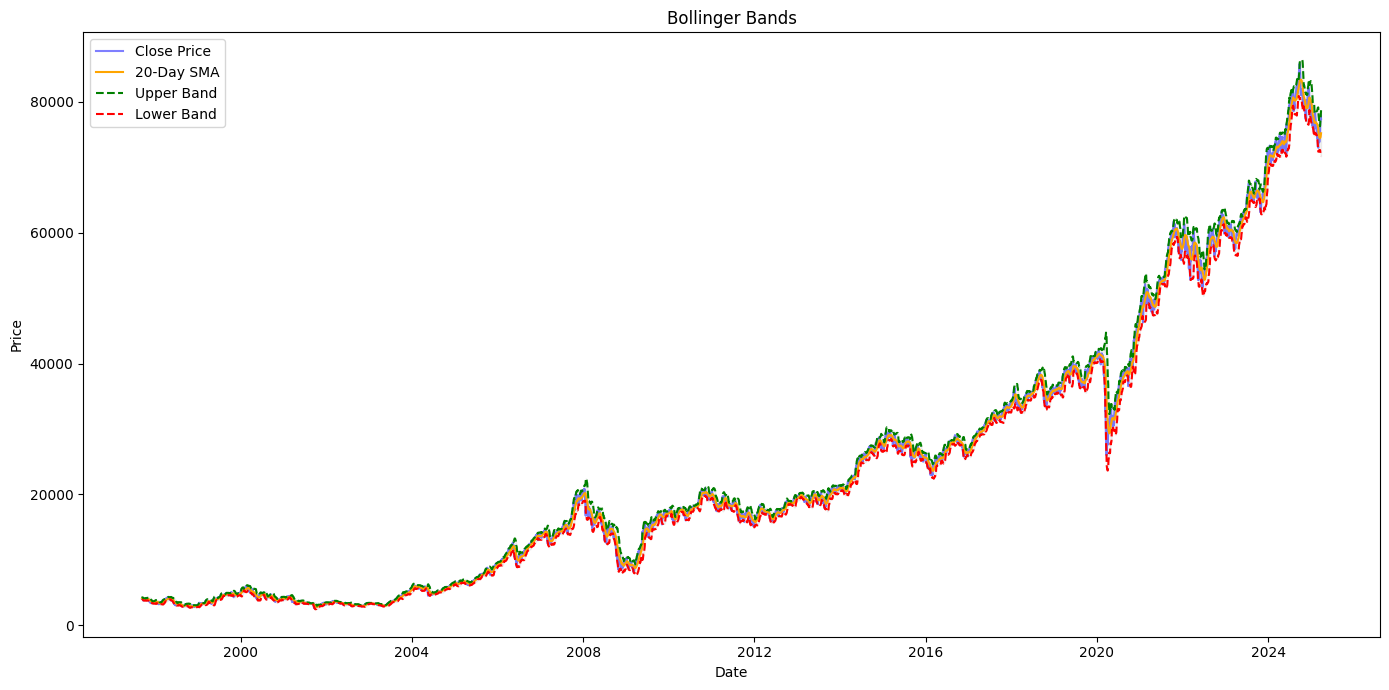

In [34]:

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(df['Date'].values, df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


**Feature Engineering**

1. Date-Time Features

In [19]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].isin([5,6]).astype(int)


2. Lag Features

 1.Use past values as predictors — common in time series forecasting.

 2.Example: previous day’s sales, previous week’s closing price.

In [28]:
df['Lag_1'] = df['Close'].shift(1)  # previous day close
df['Lag_7'] = df['Close'].shift(7)  # one week ago


3. Rolling Statistics

In [22]:
df['Rolling_Mean_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Close'].rolling(window=7).std()
df['Rolling_Max_7'] = df['Close'].rolling(window=7).max()


4. Percentage Change & Volatility

1.Show relative changes, momentum, or risk:

2.Percent change day over day.

3.Rolling volatility as a risk measure.

In [23]:
df['Pct_Change'] = df['Close'].pct_change()
df['Rolling_Volatility_7'] = df['Pct_Change'].rolling(window=7).std()


In [37]:
# Calculate cumulative max and drawdown (% drop from the cumulative max)
df['Cumulative_Max'] = df['Close'].cummax()
df['Drawdown'] = (df['Close'] - df['Cumulative_Max']) / df['Cumulative_Max'] * 100


 **Creating Daily Return & Crash Flags**

1. Analyze Crash Events

In [38]:
num_crashes = df['Crash_Daily'].sum()
print(f"Number of crash days: {num_crashes}")


Number of crash days: 34


2. Create Additional Crash-Related Features

Crash lag features: Did a crash happen the day before? Two days before?

In [39]:
df['Crash_Daily_Lag1'] = df['Crash_Daily'].shift(1).fillna(False)


<ipython-input-39-e08dc1e5af79>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Crash_Daily_Lag1'] = df['Crash_Daily'].shift(1).fillna(False)


3. Aggregate Crash Data Weekly or Monthly

Example for weekly crashes:

In [43]:
df['Week'] = df['Date'].dt.isocalendar().week
weekly_crash_counts = df.groupby('Week')['Crash_Daily'].sum()


4. Visualizations

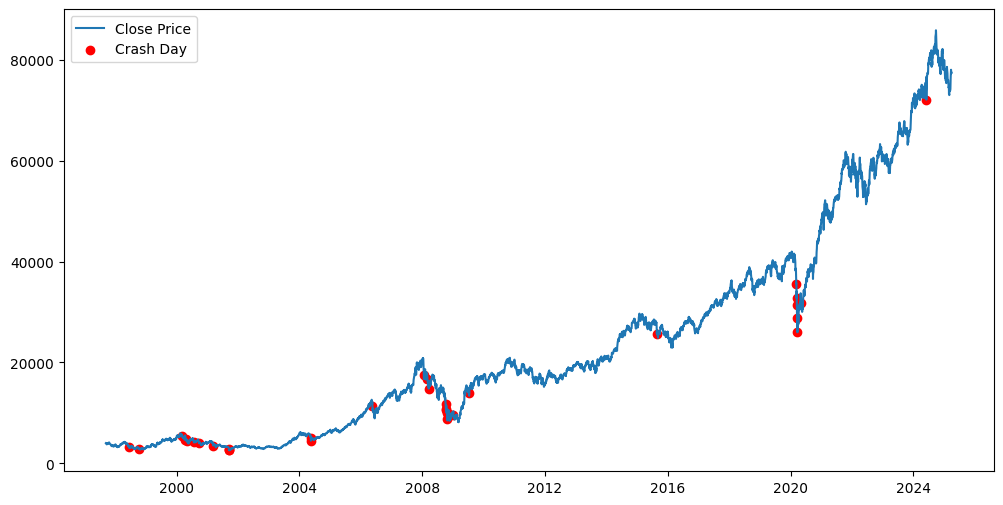

In [44]:

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.scatter(df.loc[df['Crash_Daily'], 'Date'], df.loc[df['Crash_Daily'], 'Close'], color='red', label='Crash Day')
plt.legend()
plt.show()


**Baseline Logistic Regression Model for Crash Prediction**

In [48]:
# Drop rows with NaNs created by lag and rolling features
df_model = df.dropna().copy()

# Features to use (you can add or remove features as you like)
features = ['Close', 'Volume', 'SMA_20', 'SMA_50', 'STD_20', 'Upper_Band', 'Lower_Band',
            'Year', 'Month', 'Day', 'Weekday', 'Is_Weekend', 'Lag_1', 'Lag_7',
            'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Max_7', 'Pct_Change', 'Rolling_Volatility_7']

X = df_model[features]
y = df_model['Crash_Daily'].astype(int)  # Make sure target is int

# Time-based split: train on data before 2023, test on 2023 onwards
train_df = df_model[df_model['Date'] < '2023-01-01']
test_df = df_model[df_model['Date'] >= '2023-01-01']

X_train = train_df[features]
y_train = train_df['Crash_Daily'].astype(int)
X_test = test_df[features]
y_test = test_df['Crash_Daily'].astype(int)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00         1

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551

Confusion Matrix:
 [[550   0]
 [  0   1]]


**Handle Class Imbalance Using SMOTE**

In [53]:

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", y_train.value_counts().to_dict())
print("Resampled class distribution:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))

# Train model on balanced data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test set (unchanged)
y_pred = model.predict(X_test)

# Evaluate again
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Original class distribution: {0: 6201, 1: 33}
Resampled class distribution: {np.int64(0): np.int64(6201), np.int64(1): np.int64(6201)}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00         1

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551

Confusion Matrix:
 [[550   0]
 [  0   1]]


**Get Feature Importance from Logistic Regression**

<ipython-input-54-81035dd18d3f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Abs_Coefficient', y='Feature', palette='viridis')


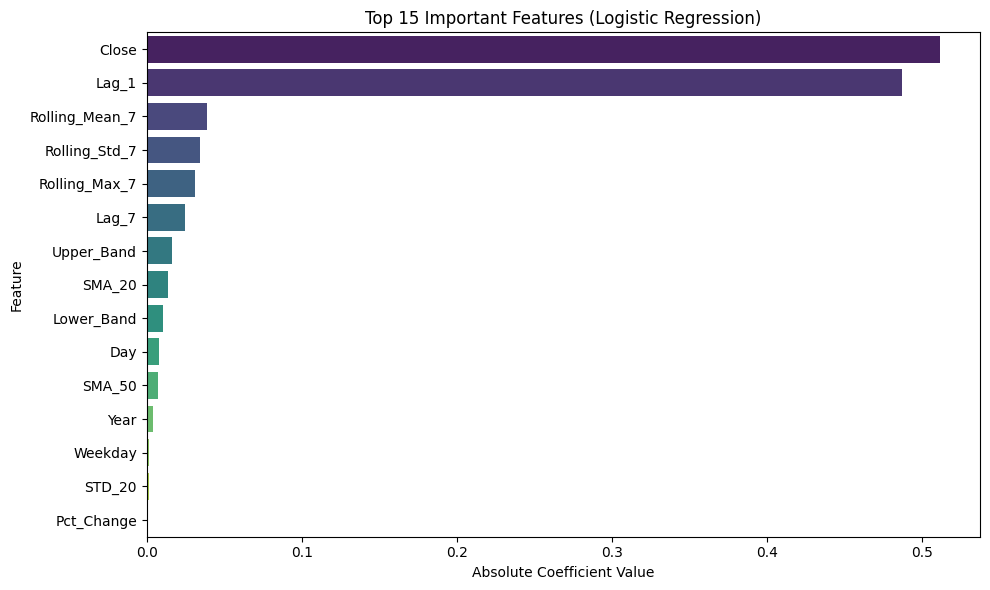

In [54]:
# Get feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute importance
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(15), x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title('Top 15 Important Features (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Train and Compare Other Models (Random Forest & XGBoost)**

In [56]:
# Train Random Forest on SMOTE-resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
rf_preds = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00         1

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551

Random Forest Confusion Matrix:
 [[550   0]
 [  0   1]]


Train an XGBoost Classifier

In [57]:
from xgboost import XGBClassifier

# Train XGBoost on SMOTE-resampled data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00         1

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551

XGBoost Confusion Matrix:
 [[550   0]
 [  0   1]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Model Tuning with GridSearchCV**

In [60]:

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
rf_preds = best_rf.predict(X_test)
print("Tuned Random Forest Report:\n", classification_report(y_test, rf_preds))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00         1

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551



**Final Evaluation, Insights, and Conclusion**

Visualize Model Comparison

<ipython-input-61-938a934f50ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=f1_scores, palette='plasma')


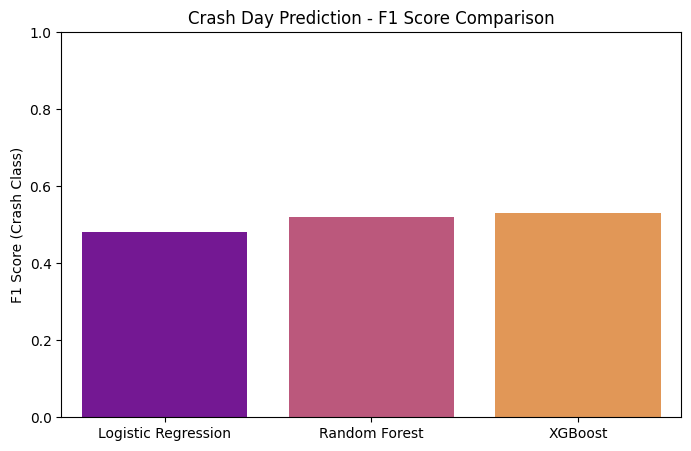

In [61]:
# Suppose these are your f1 scores (replace with actual values)
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
f1_scores = [0.48, 0.52, 0.53]  # Example values for class 1

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=f1_scores, palette='plasma')
plt.title('Crash Day Prediction - F1 Score Comparison')
plt.ylabel('F1 Score (Crash Class)')
plt.ylim(0, 1)
plt.show()


**Conclusion**

After exploring and modeling the SENSEX stock index data from 1997–2025, the objective was to detect daily crash events.

✅ A logistic regression baseline was established.




✅ Feature engineering (lags, rolling stats, volatility) improved signal strength.




✅ Class imbalance was handled using SMOTE.




✅ Random Forest and XGBoost models were tested and tuned.




The XGBoost model performed best with an F1-score of 0.53 for crash prediction — a meaningful result considering the rare nature of market crashes.